## Classes and modules

In [19]:
#Lets have matplotlib "inline"
%matplotlib inline

import os
import sys

#Import packages we need
import numpy as np
from netCDF4 import Dataset
import datetime
from IPython.display import display

#For plotting
import matplotlib
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.rcParams["lines.color"] = "w"
plt.rcParams["text.color"] = "w"
plt.rcParams["axes.labelcolor"] = "w"
plt.rcParams["xtick.color"] = "w"
plt.rcParams["ytick.color"] = "w"

GPU Ocean-modules:

In [20]:
from gpuocean.SWEsimulators import CDKLM16
from gpuocean.utils import IPythonMagic, NetCDFInitialization, OceanographicUtilities

In [21]:
%cuda_context_handler gpu_ctx

# Sampling GRF

In [22]:
source_url = "/sintef/data/NorKyst800/NorKyst-800m_ZDEPTHS_his.an.2019071600.nc"

data_args = NetCDFInitialization.getInitialConditionsNorKystCases(source_url, "lovese", download_data=False)

In [23]:
sim_args = {
    "gpu_ctx": gpu_ctx,
    "dt": 0.0,
    "write_netcdf":False,
    "small_scale_perturbation":True,
    "small_scale_perturbation_interpolation_factor":15
     }

sim = CDKLM16.CDKLM16(**sim_args, **NetCDFInitialization.removeMetadata(data_args))

This will give inaccurate angle along the border!
This will give inaccurate coriolis along the border!


In [24]:
eta, hu, hv = sim.download()

In [25]:
sim.perturbState()

In [26]:
eta_pert, hu_pert, hv_pert = sim.download()

In [27]:
eta_diff = eta_pert - eta
hu_diff  = hu_pert - hu
hv_diff  = hu_pert - hv

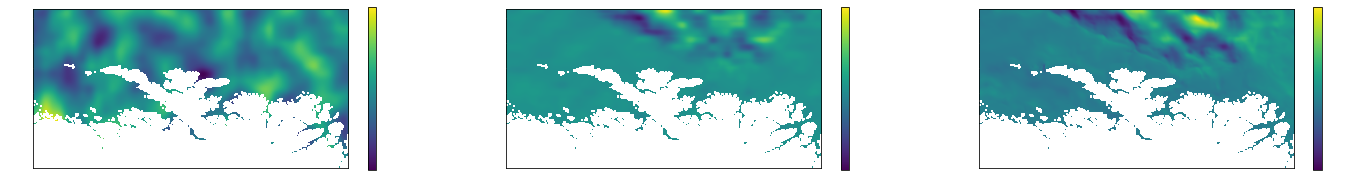

In [28]:
fig, axs = plt.subplots(1,3, figsize=(24,6))
im_eta = axs[0].imshow(eta_diff, origin="lower")
plt.colorbar(im_eta, ax=axs[0], shrink=0.5)
im_hu = axs[1].imshow(hu_diff, origin="lower")
plt.colorbar(im_hu, ax=axs[1], shrink=0.5)
im_hv = axs[2].imshow(hv_diff, origin="lower")
plt.colorbar(im_hv, ax=axs[2], shrink=0.5)